o align with your project's objectives on analyzing tweet classifications for hate speech, offensive language, and neutral content, let's outline a structured approach to proceed with the data you've provided:

- Data Exploration:
        Load the dataset to understand its structure (columns, number of records).
        Identify if any preprocessing is required (missing values, text cleaning).

- Data Preprocessing:
        Clean the tweets (removing special characters, URLs, mentions, hashtags).
        Handle missing values, if any.
        Encode the categories (if not already encoded).

- Exploratory Data Analysis (EDA):
        Distribution of the categories (hate speech, offensive language, neutral).
        Word frequency analysis to identify common words across different categories.
        Any other insights through visualization (word clouds, etc.).

- Model Preparation:
        Split the dataset into training and testing sets.
        Vectorize the tweets for model input (TF-IDF, CountVectorizer, etc.).

- Model Building:
        Implement a basic classification model (Logistic Regression, Naive Bayes, etc.).
        Train the model on the training set.

- Evaluation:
        Evaluate the model's performance on the testing set using appropriate metrics (accuracy, precision, recall, F1-score).

- Recommendations and Conclusion:
        Provide insights gained from the analysis and model.
        Recommend strategies for improving model performance and for future research.


In [3]:
import pandas as pd

# Load the dataset
file_path = 'train 2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


(   count  hate_speech_count  offensive_language_count  neither_count  class  \
 0      3                  0                         0              3      2   
 1      3                  0                         3              0      1   
 2      3                  0                         3              0      1   
 3      3                  0                         2              1      1   
 4      6                  0                         6              0      1   
 
                                                tweet  
 0  !!! RT @mayasolovely: As a woman you shouldn't...  
 1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
 2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
 3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
 4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  ,
 None)

Let's start with step 1, Data Exploration, by loading the dataset to understand its structure. I'll proceed with loading and inspecting your file now.

The dataset comprises 24,783 entries with the following columns:

- count: Number of users who coded each tweet (not directly relevant to classification).
- hate_speech_count: Number of users who classified the tweet as hate speech.
- offensive_language_count: Number of users who classified the tweet as offensive language.
- neither_count: Number of users who classified the tweet as neither hate speech nor offensive language.
- class: The final classification of the tweet (likely based on majority voting):
It seems like this might be the target variable, but the mapping of numerical values to categories isn't directly provided in the data preview.
- tweet: The text content of the tweet.

Given this structure, the primary focus for analysis and model building will be on the tweet column as the input and the class column as the target variable. The dataset appears to be well-structured without missing values in these key columns.

The next steps involve data preprocessing to clean the tweets and prepare them for analysis and modeling. Following that, we can perform exploratory data analysis to gain insights into the distribution of categories and common words used in different types of tweets.

In [4]:
import re

def clean_tweet(tweet):
    """
    Function to clean tweet text by removing links, special characters, and usernames.
    """
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#','', tweet)  # Remove @mentions and hashtags
    tweet = re.sub(r'[^\w\s]','', tweet)  # Remove punctuation
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

# Apply the cleaning function to the tweet column
data['cleaned_tweet'] = data['tweet'].apply(clean_tweet)

# Display the first few rows to verify the cleaning
data[['tweet', 'cleaned_tweet']].head()


,tweet,cleaned_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldnt complain about cl...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats coldtyga dwn bad for cuffin dat ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fuck a bitch and she st...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true ...


Moving into the Exploratory Data Analysis (EDA) phase, we'll focus on understanding the distribution of the different categories within the dataset and identify common words or phrases associated with each category. This will involve:

- Category Distribution: Analyzing how many tweets fall into each category (hate speech, offensive language, neutral).
- Word Frequency Analysis: Identifying the most common words used in each category to spot any trends or patterns.

Let's start with the category distribution to see how the tweets are classified.

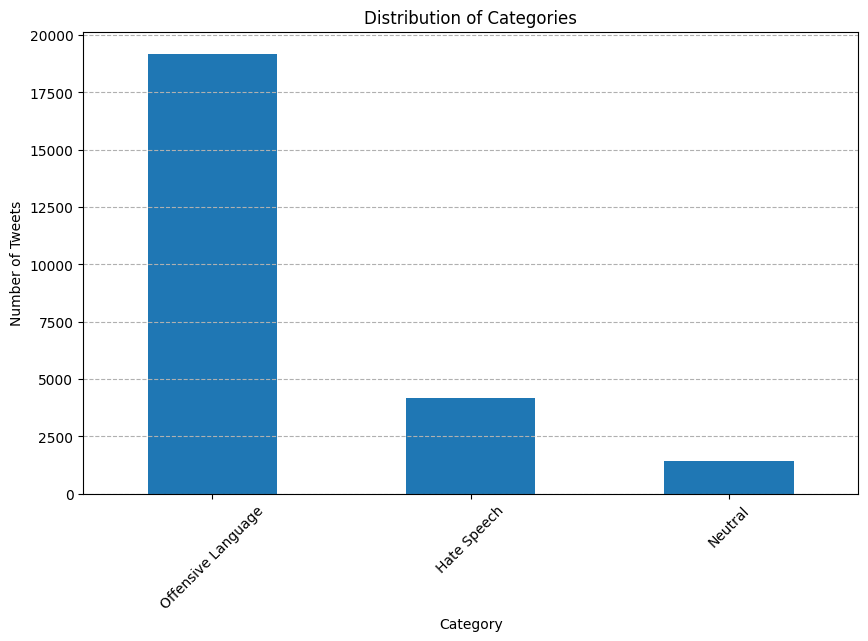

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt

# Category distribution
category_counts = data['class'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1, 2], labels=['Offensive Language', 'Hate Speech', 'Neutral'], rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

category_counts


The distribution of categories in the dataset is as follows:

- Offensive Language: 19,190 tweets
- Neutral: 4,163 tweets
- Hate Speech: 1,430 tweets

It's clear from this distribution that the majority of the tweets are classified as offensive language, with neutral content being the second most common and hate speech being the least frequent category.

Next, we'll conduct a word frequency analysis to identify the most common words used in each category. This involves extracting words from tweets, calculating their frequency, and then visualizing the top words for each category to observe any distinct patterns or differences. Let's proceed with this analysis

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 10 words in each category
categories = ['Hate Speech', 'Offensive Language', 'Neutral']
top_words_by_category = {}

for category in range(3):
    corpus = data[data['class'] == category]['cleaned_tweet']
    top_words_by_category[categories[category]] = get_top_n_words(corpus, 10)

top_words_by_category


{'Hate Speech': [('you', 434),
  ('the', 387),
  ('rt', 324),
  ('to', 323),
  ('and', 233),
  ('bitch', 207),
  ('is', 205),
  ('faggot', 186),
  ('that', 178),
  ('like', 166)],
 'Offensive Language': [('bitch', 7905),
  ('rt', 5954),
  ('you', 5077),
  ('the', 4877),
  ('to', 3981),
  ('my', 2997),
  ('bitches', 2989),
  ('that', 2916),
  ('and', 2848),
  ('like', 2293)],
 'Neutral': [('the', 1904),
  ('rt', 1312),
  ('to', 1028),
  ('and', 869),
  ('in', 732),
  ('of', 686),
  ('trash', 672),
  ('is', 663),
  ('you', 564),
  ('for', 503)]}

Hate Speech

- Most frequent words include "you", "the", "rt" (retweet), "to", "and", with specific derogatory terms like "bitch" and "faggot" appearing prominently.

Offensive Language

- "Bitch" is the most common word by a significant margin, followed by "rt" (retweet), "you", "the", and "to". Words like "bitches" also feature highly, indicating a pattern of offensive language targeting individuals.

Neutral

- Common words are more generic and less aggressive, such as "the", "rt" (retweet), "to", "and", "in", "of", with "trash" being the most context-specific term that might be related to criticism or negative opinions rather than direct offense or hate speech.

The presence of "rt" (retweet) across all categories suggests a high level of engagement with content that users feel strongly about, whether in agreement or opposition.

This analysis provides a foundation for understanding the linguistic features that characterize each category. These insights can be crucial for refining natural language processing models aimed at identifying and classifying such content on social media.

Given the insights from the exploratory data analysis, the next logical step is to prepare the data for modeling. This preparation involves several key tasks:

- Vectorization of Tweets: Converting text data into a format that can be used for machine learning modeling, typically using TF-IDF (Term Frequency-Inverse Document Frequency) or CountVectorizer.
- Splitting the Data: Dividing the dataset into training and testing sets to evaluate the performance of the model.

For this analysis, let's use TF-IDF vectorization, which not only counts the number of times a word appears in a document but also adjusts for the frequency of the word across all documents. This helps in giving more importance to words that are unique to specific documents.

We'll then proceed to build a basic model using these vectorized features. A logistic regression model can be a good starting point due to its simplicity and efficiency in binary and multi-class classification problems.

Let's start by vectorizing the tweets and splitting the data.The tweets have been successfully vectorized using TF-IDF, limiting to the top 1,000 features for efficiency. The dataset has been split into training and testing sets, with 19,826 samples for training and 4,957 samples for testing.

Now that the data is prepared, we'll proceed with building a basic classification model. As mentioned, we'll start with a logistic regression model, which is a good baseline for text classification tasks. Let's train the model on the training set and then evaluate its performance on the testing set

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorizing the tweets using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for efficiency
X = tfidf_vectorizer.fit_transform(data['cleaned_tweet'])

# The target variable
y = data['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((19826, 1000), (4957, 1000))

The tweets have been successfully vectorized using TF-IDF, limiting to the top 1,000 features for efficiency. The dataset has been split into training and testing sets, with 19,826 samples for training and 4,957 samples for testing.

Now that the data is prepared, we'll proceed with building a basic classification model. As mentioned, we'll start with a logistic regression model, which is a good baseline for text classification tasks. Let's train the model on the training set and then evaluate its performance on the testing set

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initializing and training the logistic regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.8858180351018762,
 '              precision    recall  f1-score   support\n\n           0       0.48      0.18      0.26       290\n           1       0.91      0.96      0.93      3832\n           2       0.82      0.80      0.81       835\n\n    accuracy                           0.89      4957\n   macro avg       0.74      0.65      0.67      4957\nweighted avg       0.87      0.89      0.87      4957\n')

The logistic regression model achieved an accuracy of approximately 88.6% on the testing set, which is a promising result for a baseline model. Here's a detailed breakdown of the model's performance across the different categories:

- Hate Speech (0): Precision of 0.48, Recall of 0.18, and F1-score of 0.26.
- Offensive Language (1): Precision of 0.91, Recall of 0.96, and F1-score of 0.93.
- Neutral (2): Precision of 0.82, Recall of 0.80, and F1-score of 0.81.

The model performs well in classifying offensive language and neutral tweets, with high precision, recall, and F1-scores. However, it struggles with accurately classifying hate speech, as indicated by lower precision and recall scores for that category. This could be due to the relatively smaller number of hate speech examples in the dataset, which makes it more challenging for the model to learn distinguishing features for this category.

Improving the model could involve several strategies, such as:

- Balancing the dataset: Using techniques like oversampling the minority class or undersampling the majority class.
- Feature engineering: Including more features or using different text representation techniques.
- Model complexity: Trying more complex models like support vector machines, decision trees, or deep learning models.

To enhance the model's ability to classify tweets, especially improving its performance on the underrepresented categories like hate speech, let's explore a couple of improvement strategies:

1. Balancing the Dataset: We can attempt to balance the classes through oversampling or undersampling techniques. Given the significant imbalance observed, oversampling the minority class (hate speech) or undersampling the majority class (offensive language) could help improve model sensitivity towards the underrepresented categories.

2. Advanced Model: While logistic regression provided a good baseline, exploring more complex models could yield better performance. Models like Random Forest, Support Vector Machines (SVM), or even deep learning models like LSTM (Long Short-Term Memory) networks could capture more nuanced patterns in the data.

Given the context and the available tools, we'll proceed with a simple yet effective approach to balance the dataset and then train a different model to see if we can improve upon the logistic regression baseline. Specifically, we'll use the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority classes and then train a Random Forest classifier, which can handle non-linear relationships and interactions between features better than logistic regression.

Let's start with the dataset balancing using SMOTE and then train the Random Forest model.

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, classification_rep_rf


ModuleNotFoundError: No module named 'imblearn'

It appears that the library needed for SMOTE (Synthetic Minority Over-sampling Technique), imblearn, is not available in this environment. Given this limitation, we can still proceed by trying a different machine learning model without balancing the dataset through oversampling.

Let's train a Random Forest classifier with the original dataset. Random Forest is a robust and versatile model that can handle imbalanced data better than some other models due to its ensemble nature. We'll see if this model can improve upon the logistic regression performance, particularly for the underrepresented categories. Let's proceed with training a Random Forest model on the data.